# Analysis of behavioral data from fMRI Iowa Gambling Task 2

In [9]:
import os 
import re
import pandas as pd
import numpy as np
import pip
import glob
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
data_dir = '/work/fMRI_data/iowa_exp_script/iowa_exp_data' # the direction 

# List all files in the directory
all_files = os.listdir(data_dir)

In [11]:
all_files

['._141_sess_3 (2024-09-26 11-01-56).csv',
 '138_sess_1 (2024-09-24 13-16-42).csv',
 '140_sess_2 (2024-09-25 13-43-28).csv',
 '._136_sess_1 (2024-09-24 10-40-28).csv',
 '142_sess_3 (2024-09-26 13-52-49).csv',
 '._140_sess_3 (2024-09-25 13-54-48).csv',
 '139_sess_1 (2024-09-25 10-31-26).csv',
 '._136_sess_2 (2024-09-24 10-51-31).csv',
 '142_sess_4 (2024-09-26 14-03-44).csv',
 '._136_sess_3 (2024-09-24 11-03-16).csv',
 '.ipynb_checkpoints',
 '141_sess_1 (2024-09-26 10-39-53).csv',
 '._142_sess_2 (2024-09-26 13-41-53).csv',
 '._139_sess_3 (2024-09-25 10-53-42).csv',
 '._140_sess_4 (2024-09-25 14-06-32).csv',
 '142_sess_1 (2024-09-26 13-30-59).csv',
 '._138_sess_2 (2024-09-24 13-28-19).csv',
 '141_sess_2 (2024-09-26 10-50-57).csv',
 '._140_sess_1 (2024-09-25 13-32-29).csv',
 '._142_sess_1 (2024-09-26 13-30-59).csv',
 '138_sess_3 (2024-09-24 13-39-16).csv',
 '._140_sess_2 (2024-09-25 13-43-28).csv',
 '136_sess_2 (2024-09-24 10-51-31).csv',
 '136_sess_1 (2024-09-24 10-40-28).csv',
 '._141_se

In [12]:
event_files = [file for file in all_files if file.endswith('.csv') and not file.startswith('._')]

In [13]:
event_files

['138_sess_1 (2024-09-24 13-16-42).csv',
 '140_sess_2 (2024-09-25 13-43-28).csv',
 '142_sess_3 (2024-09-26 13-52-49).csv',
 '139_sess_1 (2024-09-25 10-31-26).csv',
 '142_sess_4 (2024-09-26 14-03-44).csv',
 '141_sess_1 (2024-09-26 10-39-53).csv',
 '142_sess_1 (2024-09-26 13-30-59).csv',
 '141_sess_2 (2024-09-26 10-50-57).csv',
 '138_sess_3 (2024-09-24 13-39-16).csv',
 '136_sess_2 (2024-09-24 10-51-31).csv',
 '136_sess_1 (2024-09-24 10-40-28).csv',
 '140_sess_1 (2024-09-25 13-32-29).csv',
 '139_sess_2 (2024-09-25 10-42-36).csv',
 '139_sess_4 (2024-09-25 11-05-02).csv',
 '136_sess_4 (2024-09-24 11-14-35).csv',
 '136_sess_3 (2024-09-24 11-03-16).csv',
 '138_sess_2 (2024-09-24 13-28-19).csv',
 '141_sess_4 (2024-09-26 11-12-46).csv',
 '138_sess_4 (2024-09-24 13-50-10).csv',
 '139_sess_3 (2024-09-25 10-53-42).csv',
 '142_sess_2 (2024-09-26 13-41-53).csv',
 '141_sess_3 (2024-09-26 11-01-56).csv',
 '140_sess_3 (2024-09-25 13-54-48).csv',
 '140_sess_4 (2024-09-25 14-06-32).csv']

In [14]:
# Create an empty list to store individual dataframes
dfs = []

# Loop through each file and read it into a DataFrame
for file in event_files:
    # Construct the full file path
    file_path = os.path.join(data_dir, file)
    
    # Read the CSV file into a DataFrame
    df = pd.read_csv(file_path, sep=",")
    
    # Extract subject_id and session from the filename
    subject_id = file.split('_')[0]  # Subject ID is before the first '_'
    session = file.split('_')[2].split(' ')[0]  # Session is between the first '_' and the first space
    
    # Add subject_id and session as new columns
    df['subject_id'] = subject_id
    df['session'] = session

    # Check if the column 'block' exists, rename it to 'run' if it does
    if 'block' in df.columns:
        df = df.rename(columns={'block': 'run'})
    
    # Append the dataframe to the list
    dfs.append(df)

# Concatenate all dfs into one DataFrame
df = pd.concat(dfs, ignore_index=True)

In [15]:
df.to_csv("../out/df.csv",index=False)

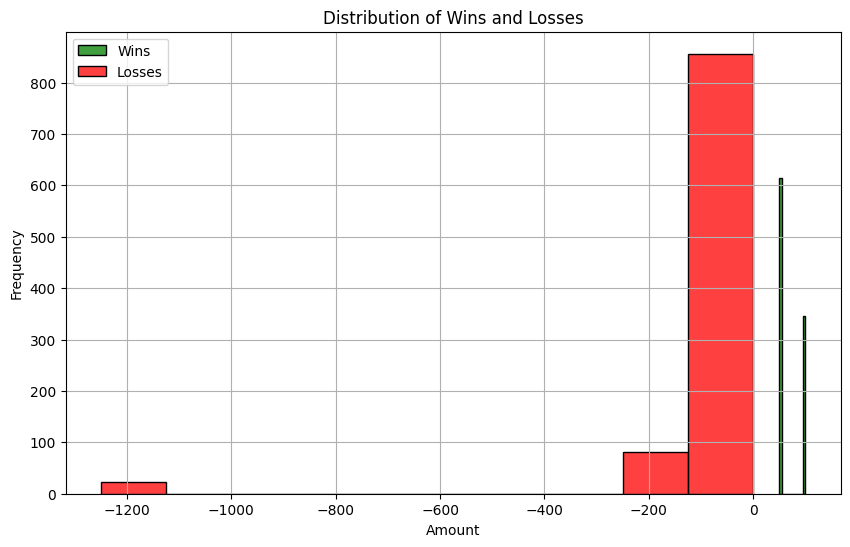

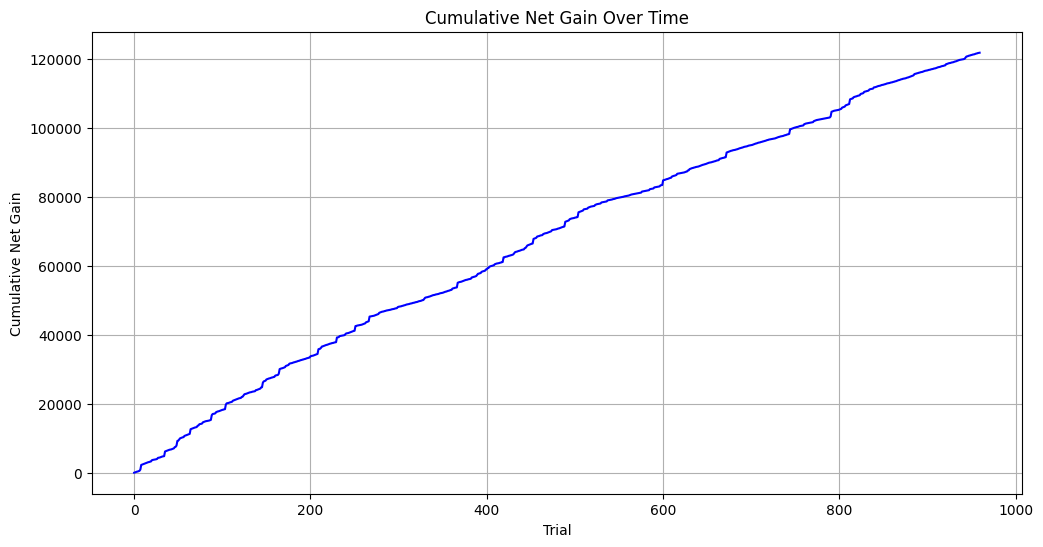

/tmp/ipykernel_9587/2241893504.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='deck_select', y='rt_select', data=df, palette='Set1')


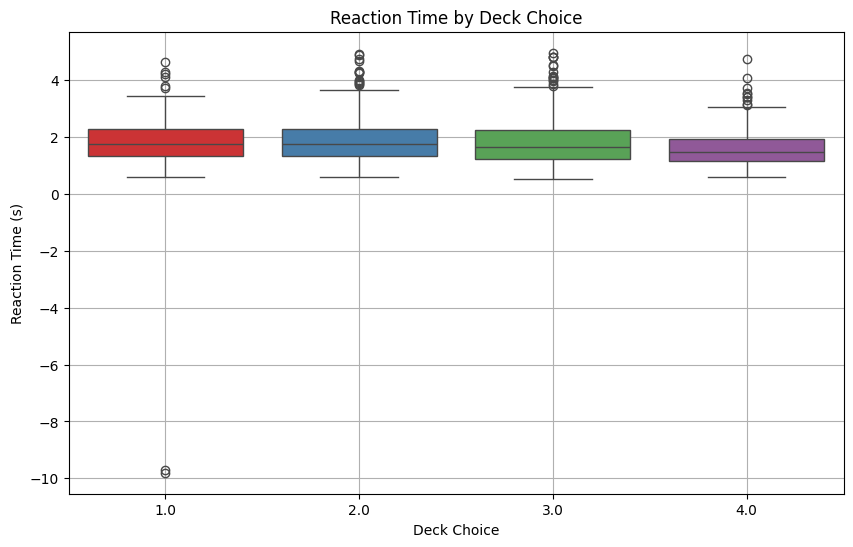

In [16]:
# 1. Distribution of Wins and Losses
plt.figure(figsize=(10, 6))
sns.histplot(df['win'], bins=10, color='green', label='Wins', kde=False)
sns.histplot(df['loss'], bins=10, color='red', label='Losses', kde=False)
plt.title('Distribution of Wins and Losses')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()

# 2. Cumulative Net Gain Over Time (assuming we calculate net gain as win - loss)
df['net_gain'] = df['win'] - df['loss']
df['cumulative_net_gain'] = df['net_gain'].cumsum()

plt.figure(figsize=(12, 6))
sns.lineplot(x=df.index, y='cumulative_net_gain', data=df, color='b')
plt.title('Cumulative Net Gain Over Time')
plt.xlabel('Trial')
plt.ylabel('Cumulative Net Gain')
plt.grid(True)
plt.show()

# 3. Reaction Time by Deck Choice (rt_select column and deck_select)
plt.figure(figsize=(10, 6))
sns.boxplot(x='deck_select', y='rt_select', data=df, palette='Set1')
plt.title('Reaction Time by Deck Choice')
plt.xlabel('Deck Choice')
plt.ylabel('Reaction Time (s)')
plt.grid(True)
plt.show()


/tmp/ipykernel_9587/3711511285.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='subject_id', y='win', data=df, palette='Set2')


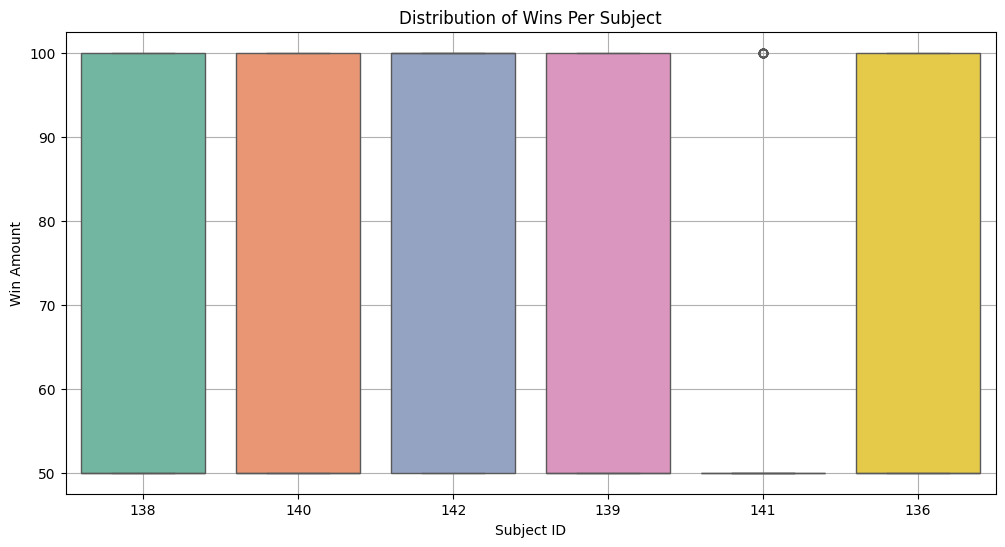

/tmp/ipykernel_9587/3711511285.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='subject_id', y='loss', data=df, palette='Set3')


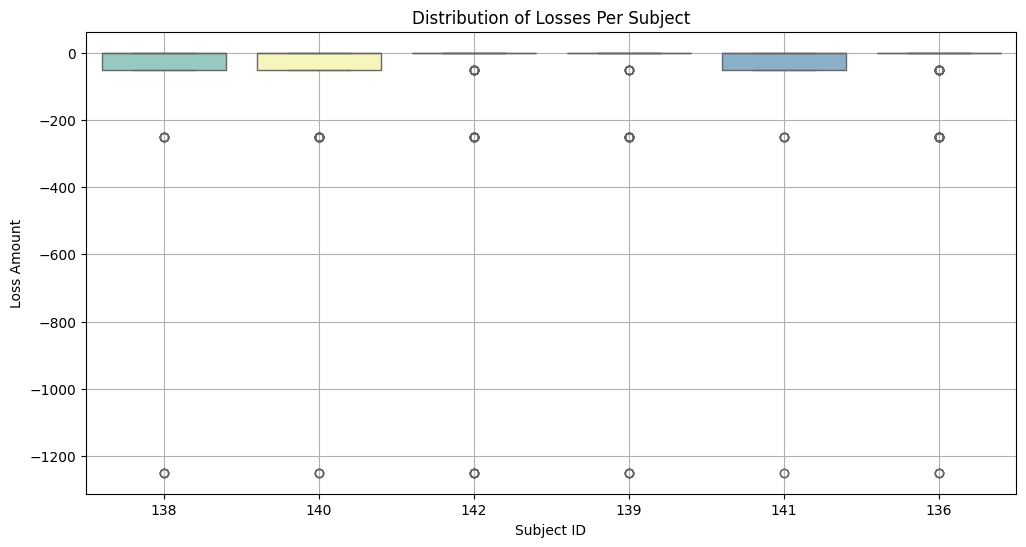

/tmp/ipykernel_9587/3711511285.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subject_data['net_gain'] = subject_data['win'] - subject_data['loss']
/tmp/ipykernel_9587/3711511285.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subject_data['cumulative_net_gain'] = subject_data['net_gain'].cumsum()
/tmp/ipykernel_9587/3711511285.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats

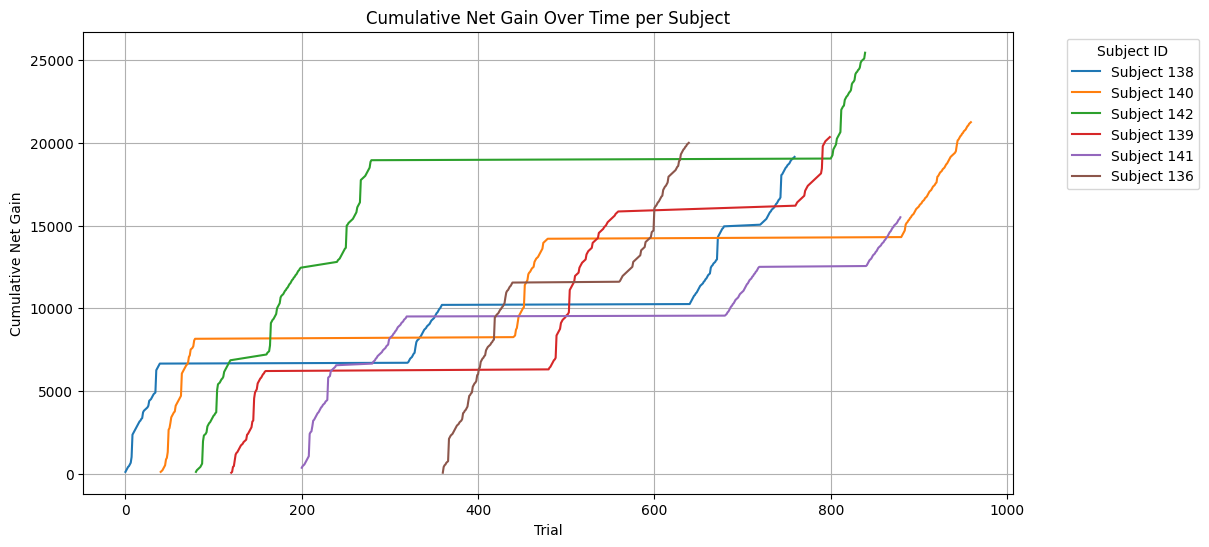

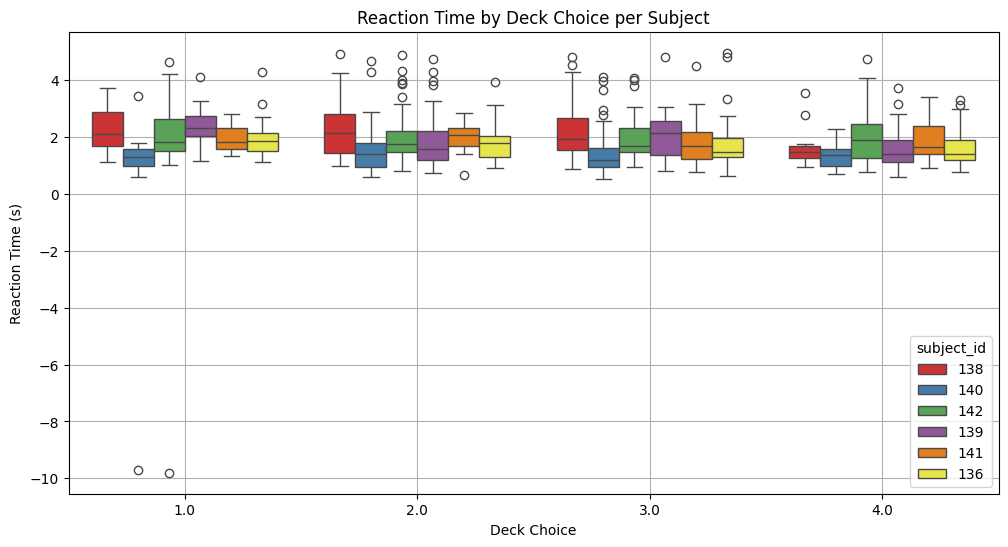

In [17]:
# Let's create more detailed plots that focus on per-subject and per-deck analysis

# 1. Distribution of Wins and Losses per Subject
plt.figure(figsize=(12, 6))
sns.boxplot(x='subject_id', y='win', data=df, palette='Set2')
plt.title('Distribution of Wins Per Subject')
plt.xlabel('Subject ID')
plt.ylabel('Win Amount')
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x='subject_id', y='loss', data=df, palette='Set3')
plt.title('Distribution of Losses Per Subject')
plt.xlabel('Subject ID')
plt.ylabel('Loss Amount')
plt.grid(True)
plt.show()

# 2. Cumulative Net Gain Over Time Per Subject
plt.figure(figsize=(12, 6))
for subject in df['subject_id'].unique():
    subject_data = df[df['subject_id'] == subject]
    subject_data['net_gain'] = subject_data['win'] - subject_data['loss']
    subject_data['cumulative_net_gain'] = subject_data['net_gain'].cumsum()
    sns.lineplot(x=subject_data.index, y='cumulative_net_gain', data=subject_data, label=f'Subject {subject}')

plt.title('Cumulative Net Gain Over Time per Subject')
plt.xlabel('Trial')
plt.ylabel('Cumulative Net Gain')
plt.legend(title='Subject ID', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

# 3. Reaction Time by Deck Choice per Subject
plt.figure(figsize=(12, 6))
sns.boxplot(x='deck_select', y='rt_select', hue='subject_id', data=df, palette='Set1')
plt.title('Reaction Time by Deck Choice per Subject')
plt.xlabel('Deck Choice')
plt.ylabel('Reaction Time (s)')
plt.grid(True)
plt.show()


/work/student_folders/sabrina_folder/virt_env/lib/python3.12/site-packages/seaborn/axisgrid.py:718: UserWarning: Using the stripplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/work/student_folders/sabrina_folder/virt_env/lib/python3.12/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
/work/student_folders/sabrina_folder/virt_env/lib/python3.12/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
/work/student_folders/sabrina_folder/virt_env/lib/python3.12/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palett

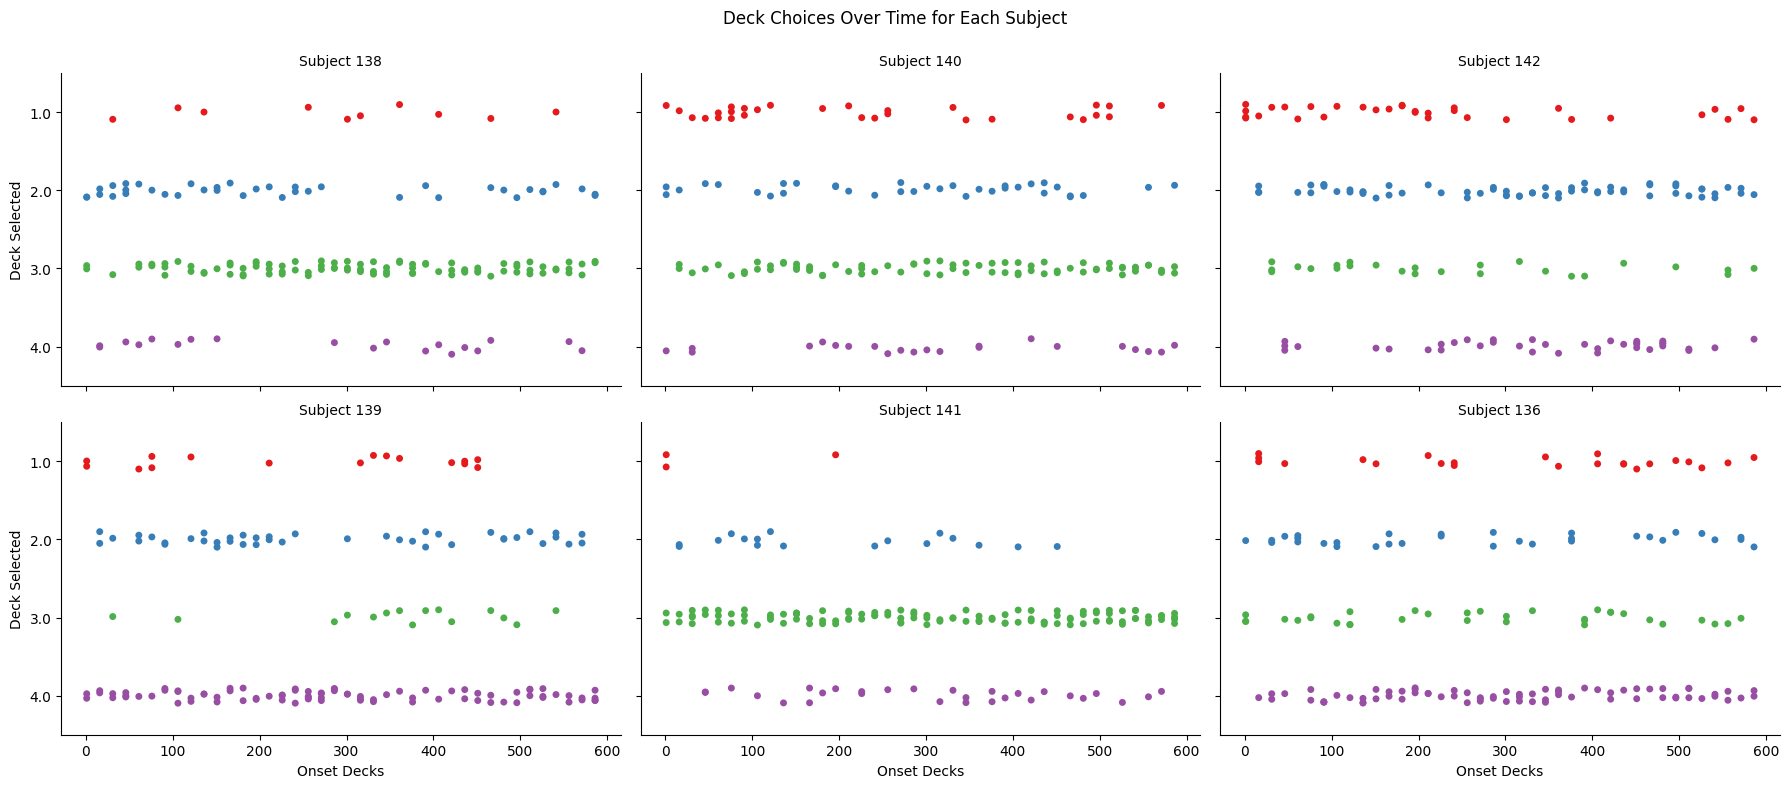

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# Convert deck_select to a categorical variable to ensure clear distinction
df['deck_select'] = df['deck_select'].astype('category')

# FacetGrid for each subject, to visualize their deck choices over time
g = sns.FacetGrid(df, col="subject_id", col_wrap=3, height=4, aspect=1.5)

# Plot a scatter plot with jitter for better visibility of overlapping points
g.map(sns.stripplot, 'onset_decks', 'deck_select', jitter=True, palette="Set1", marker='o')

# Add titles and labels
g.set_axis_labels("Onset Decks", "Deck Selected")
g.set_titles("Subject {col_name}")
plt.subplots_adjust(top=0.9)
g.fig.suptitle("Deck Choices Over Time for Each Subject")

plt.show()


In [19]:
df

,condition,onset_decks,deck_select,dur_decks,rt_select,onset_win,ID,t_moves,frames_before_decks,loss,...,n_moves,total,frames_after_decks,exp_type,no,win,dur_win,subject_id,net_gain,cumulative_net_gain
0,iowa_exp,1.049204,2.0,300,3.504827,8.535259,NaN,[2.868397400015965],330,0,...,1,100,150,"['fMRI', 'EEG', 'MEG']",1,100,120,138,100,100
1,iowa_exp,16.037049,2.0,300,4.265737,23.535915,NaN,"[17.55351330002304, 18.47008180001285, 19.2027...",330,0,...,3,200,150,"['fMRI', 'EEG', 'MEG']",2,100,120,138,100,200
2,iowa_exp,31.037626,2.0,300,1.849055,38.536638,NaN,[31.970002399990335],330,0,...,1,300,150,"['fMRI', 'EEG', 'MEG']",3,100,120,138,100,300
3,iowa_exp,46.038406,2.0,300,3.649119,53.537322,NaN,"[47.254009999975096, 48.10489560000133]",330,0,...,2,400,150,"['fMRI', 'EEG', 'MEG']",4,100,120,138,100,400
4,iowa_exp,61.039126,3.0,300,4.832486,68.554720,NaN,"[62.1388918000157, 63.42140739999013, 65.02138...",330,0,...,3,450,150,"['fMRI', 'EEG', 'MEG']",5,50,120,138,50,450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
955,iowa_exp,526.065365,3.0,300,0.732178,533.564288,NaN,[],330,-50,...,0,650,150,"['fMRI', 'EEG', 'MEG']",36,50,120,140,100,121450
956,iowa_exp,541.066058,3.0,300,0.782266,548.565022,NaN,[],330,0,...,0,700,150,"['fMRI', 'EEG', 'MEG']",37,50,120,140,50,121500
957,iowa_exp,556.066949,3.0,300,2.148826,563.565802,NaN,"[557.5990591999143, 557.9491123999469]",330,-50,...,2,700,150,"['fMRI', 'EEG', 'MEG']",38,50,120,140,100,121600
958,iowa_exp,571.067541,3.0,300,4.099024,578.566494,NaN,[572.6997954999097],330,0,...,1,750,150,"['fMRI', 'EEG', 'MEG']",39,50,120,140,50,121650


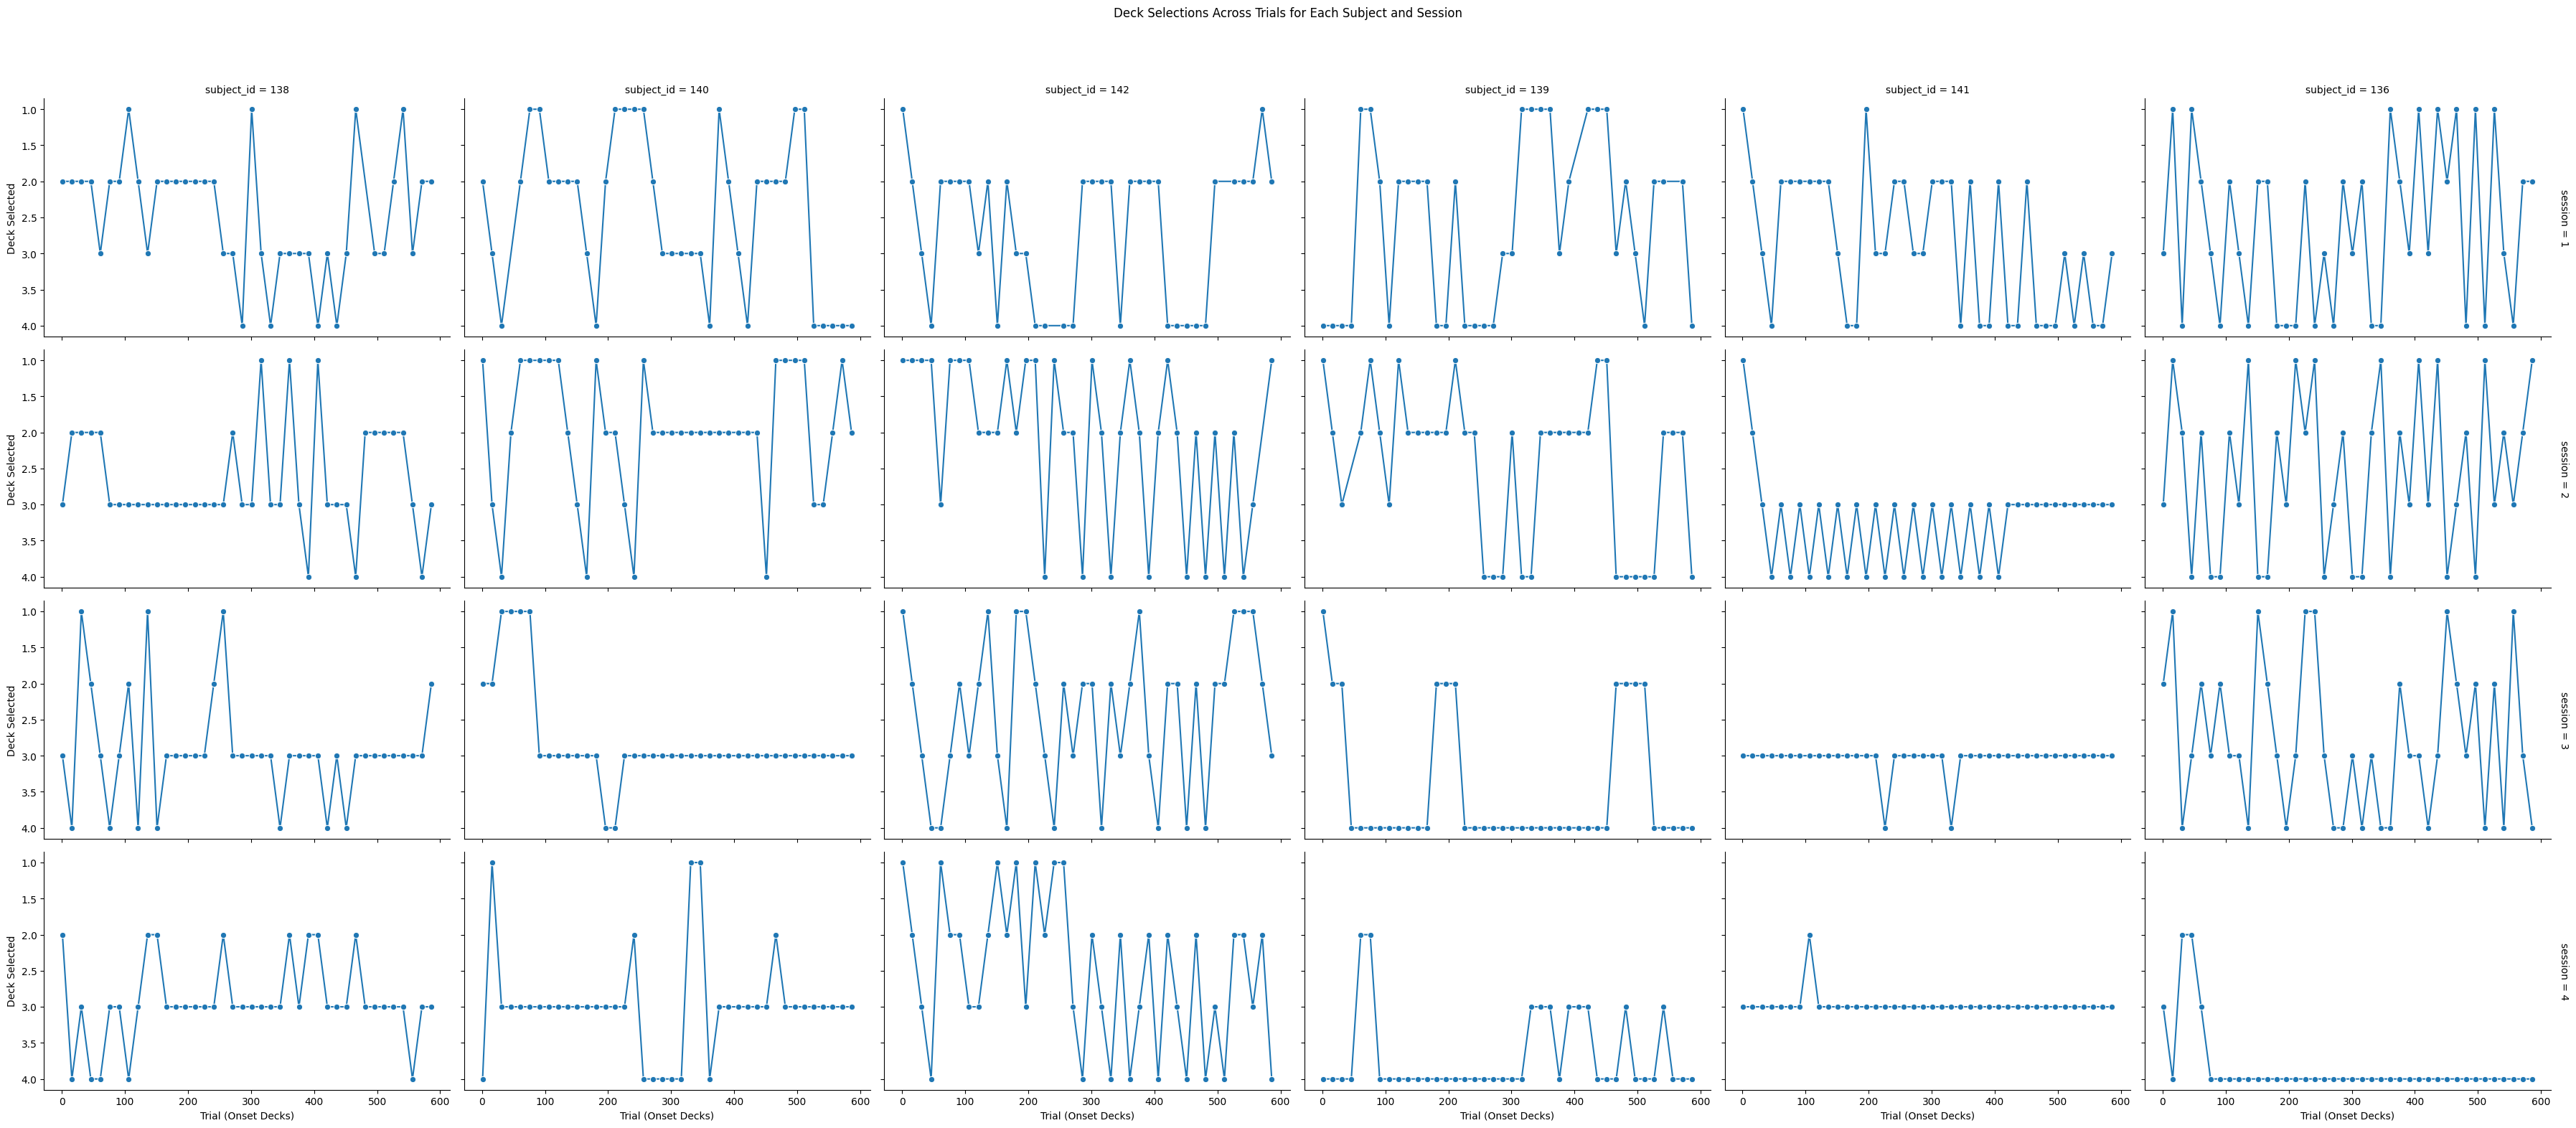

In [20]:
# Let's assume df is already loaded and available for plotting
# Plot the deck selections across trials for each subject and session

import seaborn as sns
import matplotlib.pyplot as plt

# Ensure deck_select is treated as a categorical variable
df['deck_select'] = df['deck_select'].astype('category')

# FacetGrid to plot deck selections across trials for each subject and session
g = sns.FacetGrid(df, col="subject_id", row="session", height=4, aspect=1.5, margin_titles=True)

# Plot a line plot showing deck selections over trials (onset_decks as proxy for trial order)
g.map(sns.lineplot, 'onset_decks', 'deck_select', marker="o")

# Set axis labels and plot title
g.set_axis_labels("Trial (Onset Decks)", "Deck Selected")
g.set_titles("Subject {col_name} - Session {row_name}")

plt.subplots_adjust(top=0.9)
g.fig.suptitle("Deck Selections Across Trials for Each Subject and Session")

plt.show()

In [21]:
# First, sort the dataframe by subject_id, session, and onset_decks to ensure correct order
df_sorted = df.sort_values(by=['subject_id', 'session', 'onset_decks'])

# Initialize an empty list to store the results
results = []

# Loop through each subject and session, calculating switches and trials
for (subject, session), group in df_sorted.groupby(['subject_id', 'session']):
    # Calculate the number of trials in the session
    trials = len(group)
    
    # Calculate the number of switches (change in deck_select between consecutive trials)
    switches = (group['deck_select'] != group['deck_select'].shift()).sum() - 1  # Exclude the first trial
    
    # Calculate the switch frequency as switches/trials
    switch_frequency = switches / trials
    
    # Append the results to the list
    results.append({
        'subject_id': subject,
        'session': session,
        'trials': trials,
        'switches': switches,
        'switch_frequency': switch_frequency
    })

# Create a new dataframe with the calculated data
switch_df = pd.DataFrame(results)

In [22]:
switch_df

,subject_id,session,trials,switches,switch_frequency
0,136,1,40,34,0.850
1,136,2,40,36,0.900
2,136,3,40,34,0.850
3,136,4,40,4,0.100
4,138,1,40,23,0.575
5,138,2,40,16,0.400
6,138,3,40,21,0.525
7,138,4,40,18,0.450
8,139,1,40,21,0.525
9,139,2,40,19,0.475


In [23]:
switch_df.to_csv("switch_df.csv",index=False)

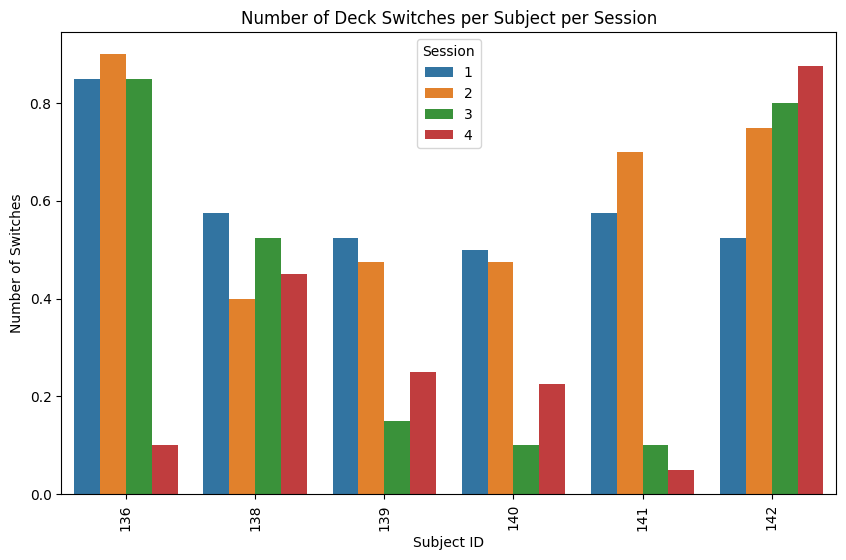

In [24]:
# Plotting the number of switches per subject per session using seaborn
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

# Create a barplot showing the number of switches per session for each subject
sns.barplot(x='subject_id', y='switch_frequency', hue='session', data=switch_df)

# Set labels and title
plt.title('Number of Deck Switches per Subject per Session')
plt.xlabel('Subject ID')
plt.ylabel('Number of Switches')

plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.legend(title='Session')

plt.show()

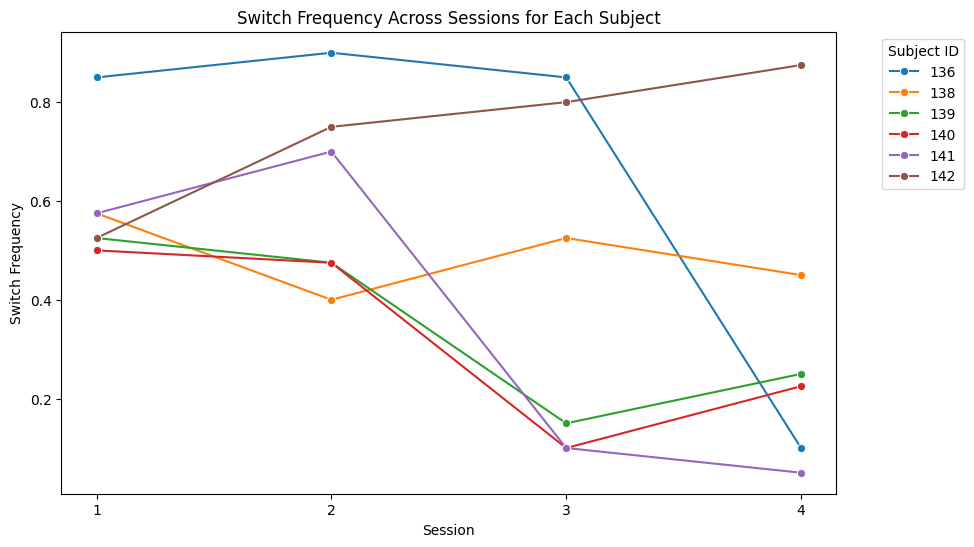

In [25]:
# Line plot of switch frequency across sessions for each subject
plt.figure(figsize=(10, 6))
sns.lineplot(x='session', y='switch_frequency', hue='subject_id', data=switch_df, marker='o')
plt.title('Switch Frequency Across Sessions for Each Subject')
plt.xlabel('Session')
plt.ylabel('Switch Frequency')
plt.legend(title='Subject ID', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


In [26]:
switch_df

,subject_id,session,trials,switches,switch_frequency
0,136,1,40,34,0.850
1,136,2,40,36,0.900
2,136,3,40,34,0.850
3,136,4,40,4,0.100
4,138,1,40,23,0.575
5,138,2,40,16,0.400
6,138,3,40,21,0.525
7,138,4,40,18,0.450
8,139,1,40,21,0.525
9,139,2,40,19,0.475
